In [3]:
from potentialflowvisualizer import *
%matplotlib widget

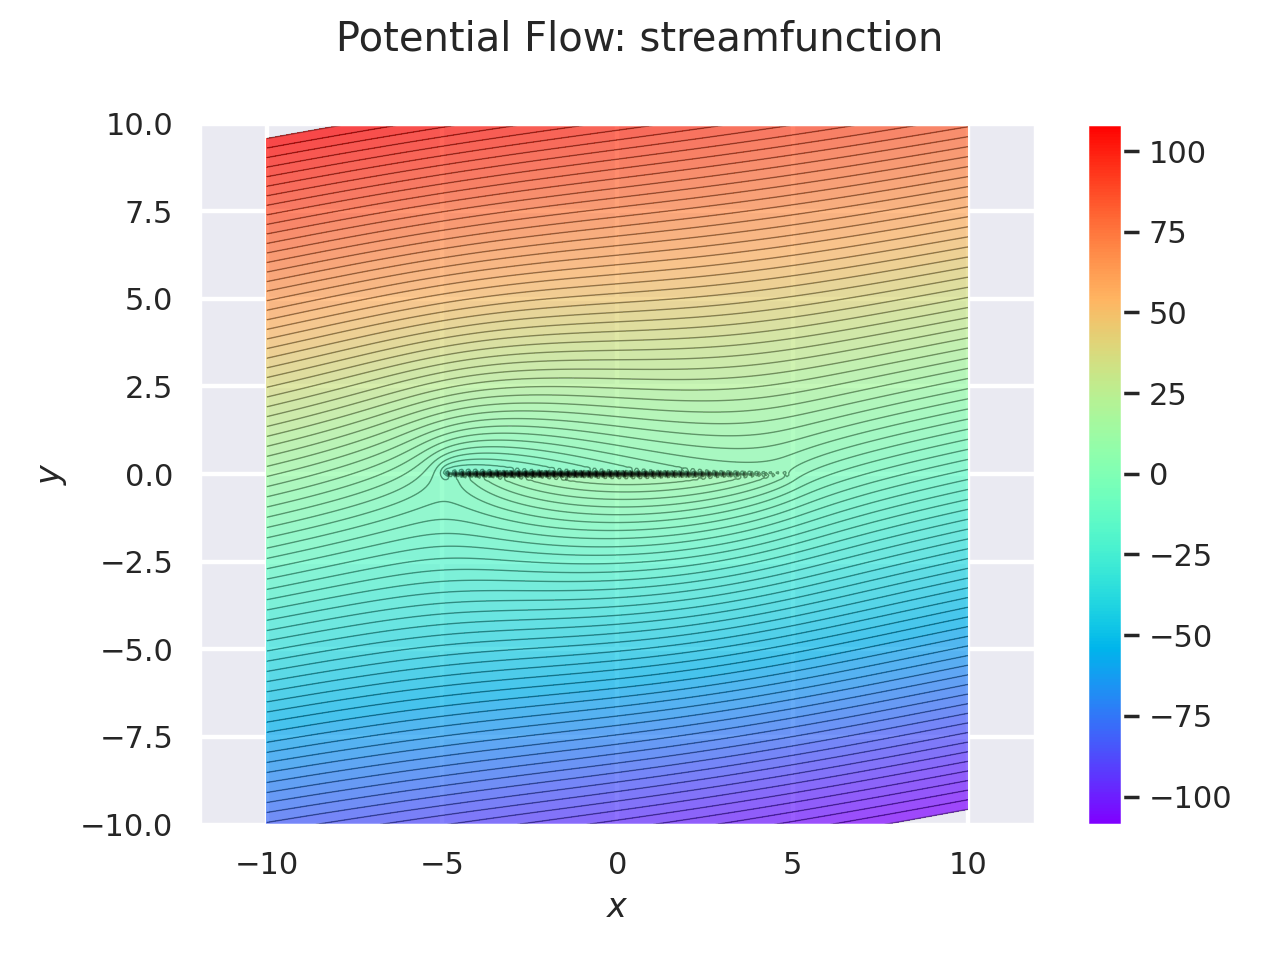

In [4]:
# Body Geometry definition
x = np.linspace(-5, 5, 51)
c = np.max(x) - np.min(x)
x0 = np.min(x)
y = 0.2 * c * 10 * (
        + 0.2969 * ((x - x0) / c) ** 0.5
        - 0.1260 * ((x - x0) / c)
        - 0.3516 * ((x - x0) / c) ** 2
        + 0.2843 * ((x - x0) / c) ** 3
        - 0.1036 * ((x - x0) / c) ** 4
)
dy = np.diff(y)

# Freestream properties
V = 10
alpha = 10
alpha_rad = np.radians(alpha)

# Set up the flowfield
field = Flowfield([
    Freestream(V * np.cos(alpha_rad), V * np.sin(alpha_rad))
])

field.objects.extend( # Add line sources to model the thickness
    [LineSource(V * dy[i], x[i], 0, x[i + 1], 0) for i in range(len(x) - 1)]
)
field.objects.extend( # Add doublets to model crossflow
    [Doublet(2 * V * y[i] * alpha_rad, x[i], 0, np.radians(90)) for i in range(len(x))]
)

field.draw("streamfunction") # And visualize it